In [68]:
import pandas as pd

In [126]:
data = pd.read_csv('./addedroi.csv')

data


,Unnamed: 0.1,Unnamed: 0,name,studio,runtime_minutes,genres,original_language,popularity,release_date_x,vote_average,vote_count,production_budget,domestic_gross_y,worldwide_gross,roi
0,0,0,Toy Story 3,BV,103.0,"Adventure,Animation,Comedy",en,24.445,2010-06-17,7.7,8340,"$200,000,000","$415,004,880","$1,068,879,522",5.344398
1,1,1,Inception,WB,148.0,"Action,Adventure,Sci-Fi",en,27.920,2010-07-16,8.3,22186,"$160,000,000","$292,576,195","$835,524,642",5.222029
2,2,2,Shrek Forever After,P/DW,93.0,"Adventure,Animation,Comedy",en,15.041,2010-05-16,6.1,3843,"$165,000,000","$238,736,787","$756,244,673",4.583301
3,3,3,The Twilight Saga: Eclipse,Sum.,124.0,"Adventure,Drama,Fantasy",en,20.340,2010-06-23,6.0,4909,"$68,000,000","$300,531,751","$706,102,828",10.383865
4,4,4,Iron Man 2,Par.,124.0,"Action,Adventure,Sci-Fi",en,28.515,2010-05-07,6.8,12368,"$170,000,000","$312,433,331","$621,156,389",3.653861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,1947,2092,Mandy,RLJ,113.0,"Drama,Thriller",en,16.240,2018-09-13,6.2,618,"$6,000,000","$1,214,525","$1,427,656",0.237943
1948,1948,2093,Mandy,RLJ,121.0,"Action,Fantasy,Horror",en,0.600,2016-01-24,3.5,2,"$6,000,000","$1,214,525","$1,427,656",0.237943
1949,1949,2094,Mandy,RLJ,121.0,"Action,Fantasy,Horror",en,16.240,2018-09-13,6.2,618,"$6,000,000","$1,214,525","$1,427,656",0.237943
1950,1950,2095,Lean on Pete,A24,121.0,"Adventure,Drama",en,9.307,2018-04-06,6.9,133,"$8,000,000","$1,163,056","$2,455,027",0.306878


In [75]:
title = data.loc[:,['name']]
studio = data.loc[:,['studio']]
runtime = data.loc[:,['runtime_minutes']]
listofgenre = data.loc[:,['genres']]
language = data.loc[:,['original_language']]
popularity = data.loc[:,['popularity']]
releaseDate = data.loc[:,['release_date_x']]
voteavg = data.loc[:,['vote_average']]
votecount = data.loc[:,['vote_count']]
budget = data.loc[:,['production_budget']]
domesticGross = data.loc[:,['domestic_gross_y']]
worldGross = data.loc[:,['worldwide_gross']]


In [138]:
gen = listofgenre.stack().to_list()


In [81]:
from collections import defaultdict

# Step 1: Initialize a dictionary to hold genre counts
genre_counts = defaultdict(int)

# Step 2: Loop through each genre string, split it, and count each genre
for genres in gen:
    # Split the genres and strip any extra whitespace
    individual_genres = genres.split(',')
    for genre in individual_genres:
        genre = genre.strip()  # Ensure no leading/trailing whitespace
        genre_counts[genre] += 1

# Convert the defaultdict to a regular dictionary (optional)
genre_counts = dict(genre_counts)

# Display the result
print(genre_counts)

{'Adventure': 367, 'Animation': 112, 'Comedy': 550, 'Action': 471, 'Sci-Fi': 131, 'Drama': 1009, 'Fantasy': 129, 'Family': 95, 'Thriller': 332, 'History': 73, 'Romance': 231, 'Horror': 225, 'Mystery': 145, 'Western': 8, 'Biography': 192, 'Documentary': 137, 'Crime': 255, 'Sport': 45, 'War': 15, 'Music': 55, 'Musical': 6, 'News': 2}


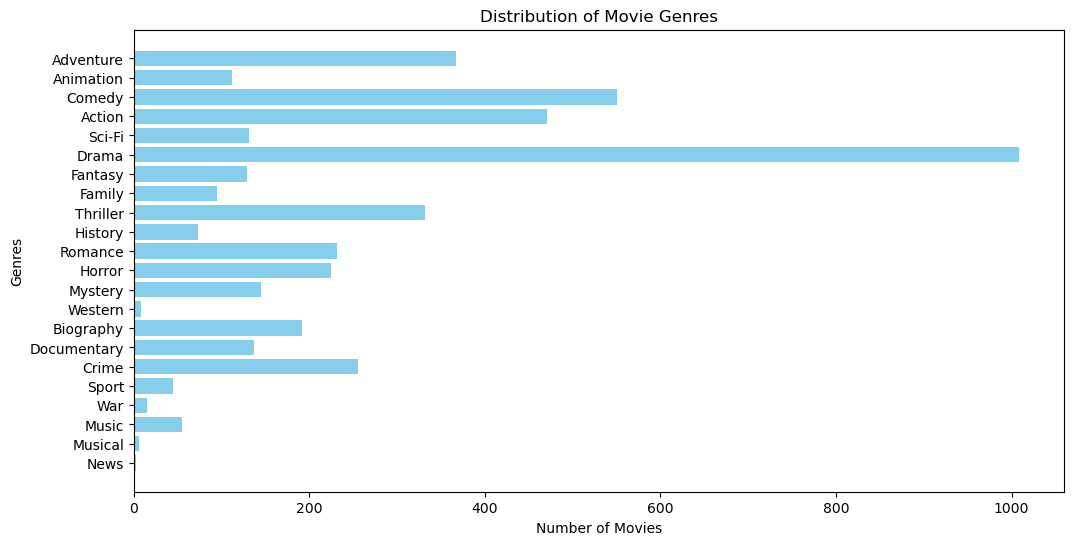

In [82]:
import matplotlib.pyplot as plt

# Convert dictionary keys and values to lists for plotting
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Bar plot for genre counts
plt.figure(figsize=(12, 6))
plt.barh(genres, counts, color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Distribution of Movie Genres')
plt.gca().invert_yaxis()  # Optional, to have highest count at the top
plt.show()


In [84]:
# Initialize a dictionary to hold lists of titles for each genre
genre_movies = defaultdict(list)

# Loop through each row in the DataFrame
for _, row in data.iterrows():
    # Split the genres in the current row
    row_genres = row["genres"].split(',')
    for genre in row_genres:
        genre = genre.strip()  # Remove any extra whitespace
        # Check if the genre exists in genre_counts and add the title to genre_movies
        if genre in genre_counts:
            genre_movies[genre].append(row["name"])

# Convert the defaultdict to a regular dictionary (optional)
genre_movies = dict(genre_movies)

# Display the result
print(genre_movies)

{'Adventure': ['Toy Story 3', 'Inception', 'Shrek Forever After', 'The Twilight Saga: Eclipse', 'Iron Man 2', 'Tangled', 'How to Train Your Dragon', 'The Chronicles of Narnia: The Voyage of the Dawn Treader', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'Robin Hood', 'The Last Airbender', 'Resident Evil: Afterlife', 'The Tourist', 'The Expendables', 'True Grit', "Gulliver's Travels", "The Sorcerer's Apprentice", 'Due Date', 'Yogi Bear', 'The A-Team', 'The Book of Eli', "Legend of the Guardians: The Owls of Ga'Hoole", 'Predators', 'Get Him to the Greek', 'Letters to Juliet', '127 Hours', 'The Losers', 'Ramona and Beezus', 'Centurion', 'The Runaways', 'Transformers: Dark of the Moon', 'Pirates of the Caribbean: On Stranger Tides', 'Kung Fu Panda 2', 'The Smurfs', 'Cars 2', 'Puss in Boots', 'Sherloc

In [85]:
genre_movies.keys()

dict_keys(['Adventure', 'Animation', 'Comedy', 'Action', 'Sci-Fi', 'Drama', 'Fantasy', 'Family', 'Thriller', 'History', 'Romance', 'Horror', 'Mystery', 'Western', 'Biography', 'Documentary', 'Crime', 'Sport', 'War', 'Music', 'Musical', 'News'])

In [120]:
adventure = genre_movies.get('Adventure', [])
adventure = pd.Series(adventure)
adventuredata = data[data['name'].isin(adventure)]
adventuredata
# Remove dollar sign and convert to float
numeric_values = [float(value.replace("$", "").replace(",", "")) for value in adventuredata['worldwide_gross']]

print(sum(numeric_values)/len(numeric_values))


327051013.45755696


In [114]:
genrevenue = []
for key, value in genre_movies.items():
    movies = genre_movies.get(key, [])
    movies = pd.Series(movies)
    moviedata = data[data['name'].isin(movies)]
    # getting avg
    numeric_values = [float(value.replace("$", "").replace(",", "")) for value in moviedata['worldwide_gross']]
    avg = sum(numeric_values)/len(numeric_values)
    
    genrevenue.append({key:avg})
    

In [115]:
genrevenue

[{'Adventure': 327051013.45755696},
 {'Animation': 309852855.9484536},
 {'Comedy': 136828331.64375},
 {'Action': 208088091.508346},
 {'Sci-Fi': 284320427.84408605},
 {'Drama': 88397666.96439394},
 {'Fantasy': 206472039.99082568},
 {'Family': 147991085.90184048},
 {'Thriller': 102755696.75167786},
 {'History': 145335375.02469134},
 {'Romance': 95764959.83861671},
 {'Horror': 95064944.02977668},
 {'Mystery': 74301030.31102362},
 {'Western': 123227230.25},
 {'Biography': 86758528.25706215},
 {'Documentary': 101281327.52209945},
 {'Crime': 87310770.13199106},
 {'Sport': 228951560.25555557},
 {'War': 30669657.222222224},
 {'Music': 40744503.75384615},
 {'Musical': 146652533.875},
 {'News': 31657826.5}]

In [124]:
genrate = []
for key, value in genre_movies.items():
    movies = genre_movies.get(key, [])
    movies = pd.Series(movies)
    moviedata = data[data['name'].isin(movies)]
    # getting avg
    numeric_values = [float(value) for value in moviedata['vote_average']]
    avg = sum(numeric_values)/len(numeric_values)
    
    genrate.append({key:avg})

In [125]:
genrate

[{'Adventure': 6.358385093167701},
 {'Animation': 5.998453608247417},
 {'Comedy': 6.204},
 {'Action': 6.214264036418814},
 {'Sci-Fi': 6.308602150537629},
 {'Drama': 6.39401515151515},
 {'Fantasy': 6.0252293577981595},
 {'Family': 6.430061349693251},
 {'Thriller': 5.944295302013417},
 {'History': 6.388888888888883},
 {'Romance': 6.424207492795383},
 {'Horror': 5.919106699751857},
 {'Mystery': 6.187007874015752},
 {'Western': 6.5625},
 {'Biography': 6.254519774011295},
 {'Documentary': 6.237569060773485},
 {'Crime': 6.14228187919463},
 {'Sport': 6.394444444444449},
 {'War': 6.614814814814815},
 {'Music': 5.856923076923071},
 {'Musical': 6.975},
 {'News': 5.7}]

In [127]:
genroi = []
for key, value in genre_movies.items():
    movies = genre_movies.get(key, [])
    movies = pd.Series(movies)
    moviedata = data[data['name'].isin(movies)]
    # getting avg
    numeric_values = [float(value) for value in moviedata['roi']]
    avg = sum(numeric_values)/len(numeric_values)
    
    genroi.append({key:avg})

In [128]:
genroi

[{'Adventure': 3.0286979474720246},
 {'Animation': 2.8858046659487147},
 {'Comedy': 5.533418928715889},
 {'Action': 4.257907110886347},
 {'Sci-Fi': 3.825212525255551},
 {'Drama': 4.439311242373596},
 {'Fantasy': 7.886027303181268},
 {'Family': 2.392659397059059},
 {'Thriller': 7.600768757456488},
 {'History': 2.91583179642417},
 {'Romance': 8.943666258616249},
 {'Horror': 11.14942872447719},
 {'Mystery': 7.505021515679655},
 {'Western': 1.8406885466139071},
 {'Biography': 2.372542553207519},
 {'Documentary': 3.4243335778819346},
 {'Crime': 1.9325104435120746},
 {'Sport': 14.221628573348857},
 {'War': 1.6772890173388362},
 {'Music': 2.270996068063072},
 {'Musical': 4.287220227056277},
 {'News': 0.9834108591954022}]

In [137]:

# Initialize a dictionary to combine values
combined_dict = {}

# Combine the first list of dictionaries
for entry in genrevenue:
    for key, value in entry.items():
        combined_dict[key] = [value]  # Start a new list for each genre

# Append the values from the second list of dictionaries
for entry in genrate:
    for key, value in entry.items():
        if key in combined_dict:
            combined_dict[key].append(value)  # Append to existing list

# Append the values from the third list of dictionaries
for entry in genroi:
    for key, value in entry.items():
        if key in combined_dict:
            combined_dict[key].append(value)  # Append to existing list


# Convert the combined dictionary into a DataFrame
combined_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in combined_dict.items()]))

# Transpose the DataFrame
transposed_df = combined_df.T

# Change column names
transposed_df.columns = ['genre_avg_gross', 'gen_avg_rating', 'gen_avg_roi']  # Assign new column names

# Optionally, reset the index to make the genre names a column
transposed_df.reset_index(inplace=True)

# Rename the index column for clarity
transposed_df.rename(columns={'index': 'Genre'}, inplace=True)

# Display the transposed DataFrame
# transposed_df.to_csv('./genreAnalysis.csv')


In [142]:
transposed_df

,Genre,genre_avg_gross,gen_avg_rating,gen_avg_roi
0,Adventure,3.270510e+08,6.358385,3.028698
1,Animation,3.098529e+08,5.998454,2.885805
2,Comedy,1.368283e+08,6.204000,5.533419
3,Action,2.080881e+08,6.214264,4.257907
4,Sci-Fi,2.843204e+08,6.308602,3.825213
5,Drama,8.839767e+07,6.394015,4.439311
6,Fantasy,2.064720e+08,6.025229,7.886027
7,Family,1.479911e+08,6.430061,2.392659
8,Thriller,1.027557e+08,5.944295,7.600769
9,History,1.453354e+08,6.388889,2.915832


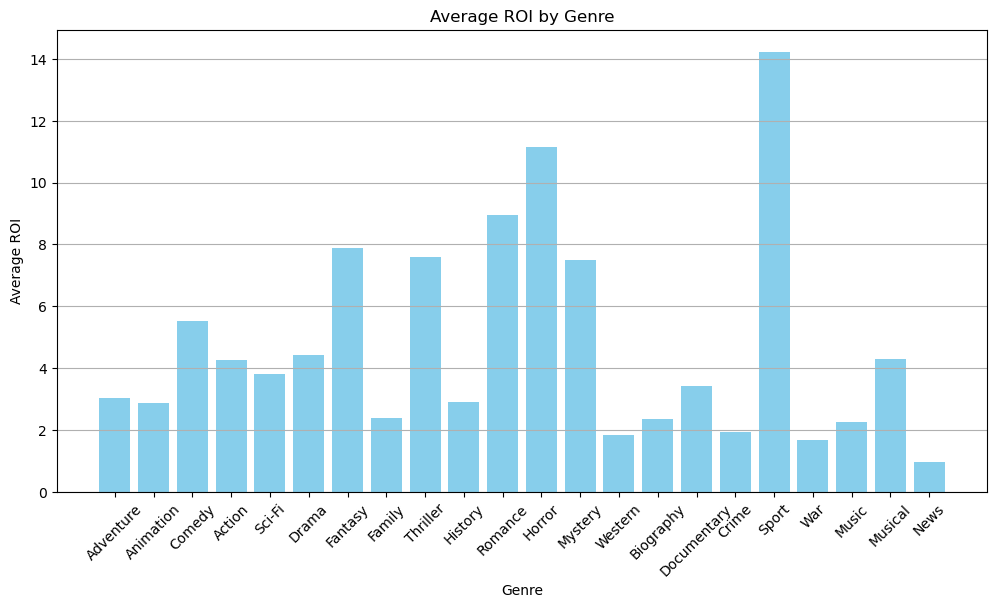

In [143]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(transposed_df['Genre'], transposed_df['gen_avg_roi'], color='skyblue')
plt.title('Average ROI by Genre')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()